In [ ]:
# 드라이브  마운트
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Chunknet/darknet-master
!make

/content/gdrive/MyDrive/Chunknet/darknet-master
chmod +x *.sh


In [ ]:
!cp ./darknet /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64

In [ ]:
!chmod +x /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/darknet

In [ ]:
# 데이터셋 annotation을 읽고 하나의 txt 파일에 저장
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np


path='/content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/data/Dataset_01'
im=[]
i=0
for root,dirs, files in os.walk(path):
  for idx, file in enumerate(files):
    
    fname, ext = os.path.splitext(file)

    if ext in ['.txt']:

      textname = ''

      with open(path+'/'+fname+ext, 'r') as txt:
          a = txt.read()
          a = a.replace('15 ', '0 ') # small boundingbox 에서 네잎클로버 라벨링용 넘버링 과정에서 0이아닌 15로 저장되어 0으로 통일하기 위함
      with open(path+'/'+fname+ext, 'w+') as txt:
          txt.write(a)

In [ ]:
# 데이터셋 이미지 불러오기
from glob import glob

img_list = glob('/content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/data/Dataset_01/*.jpg')
print(len(img_list))

339


In [ ]:
# 데이터셋 분리 (train / test)
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.1)

print(len(train_img_list), len(val_img_list))

305 34


In [ ]:
# 분리한 데이터셋에 대한 정보 저장
with open('/content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/data/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/data/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [ ]:
# 각 데이터셋에 맞는 anchor 값 계산하여 cfg파일 업데이트
# chun_1,2,3,4,5.cfg 파일의 경우 업데이트 되어 있음
# train을 새로 하지 않을 경우 안돌려도 됨
%cd /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64
!./darknet detector calc_anchors /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/data/chun.data -num_of_clusters 9 -width 416 -height 416

/content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0

 num_of_clusters = 9, width = 416, height = 416 
 read labels from 305 images 
 loaded 	 image: 305 	 box: 392
 all loaded. 

 calculating k-means++ ...

 iterations = 15 


counters_per_class = 392

 avg IoU = 81.51 % 

Saving anchors to the file: anchors.txt 
anchors =  48, 59,  73, 74,  67,102, 101, 94,  91,146, 133,124, 137,192, 208,178, 260,268
^C


In [ ]:
# 모델 학습
# 경우에 맞게 cfg파일 및 weight파일 수정
# darknet53.conv.74의 경우 custom_data에 대해 학습을 위한 초기 가중치 파일
# 새로운 데이터에 대학 학습 예시
# 1. x64/data 경로에 데이터셋 업로드
# 2. 마운트~anchor 값까지 계산 후 결과를 통해 cfg 파일 업데이트
# 3. 일부 파라미터 또한 원작자의 github을 참고하여 클래스 개수에 맞게 cfg 파일 업데이트
# 4. 밑의 detector train 이후의 .data 와 .cfg 와 .weight(첫 학습의 경우 darknet53.conv.74)을 경로에 맞게 설정 후 실행
%cd /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64
!./darknet detector train /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/data/chun.data /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/chun.cfg /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/backup/darknet53.conv.74 -map -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.673641), count: 2, class_loss = 0.241900, iou_loss = 0.355116, total_loss = 0.597016 
 total_bbox = 311966, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.854923), count: 3, class_loss = 0.007908, iou_loss = 0.031049, total_loss = 0.038957 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.125505, iou_loss = 0.000000, total_loss = 0.125505 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.875758), count: 2, class_loss = 0.068516, iou_loss = 0.024187, total_loss = 0.092703 
 total_bbox = 311971, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.889900), count: 2, class_loss = 0.031636, iou_loss = 0.039449, total_loss = 0.071086 
v3 (mse loss, Normal

In [ ]:
# 모델 테스트 (단일 이미지 예측)
# 실험 시 원하는 cfg파일 및 weight파일 변경
# 예측 원하는 이미지 경로 설정
%cd /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64
! ./darknet detector test /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/data/chun.data /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/chun_4.cfg /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/backup/chun_5.weights /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/data/test_image/1515.JPG -dont_show

/content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 B

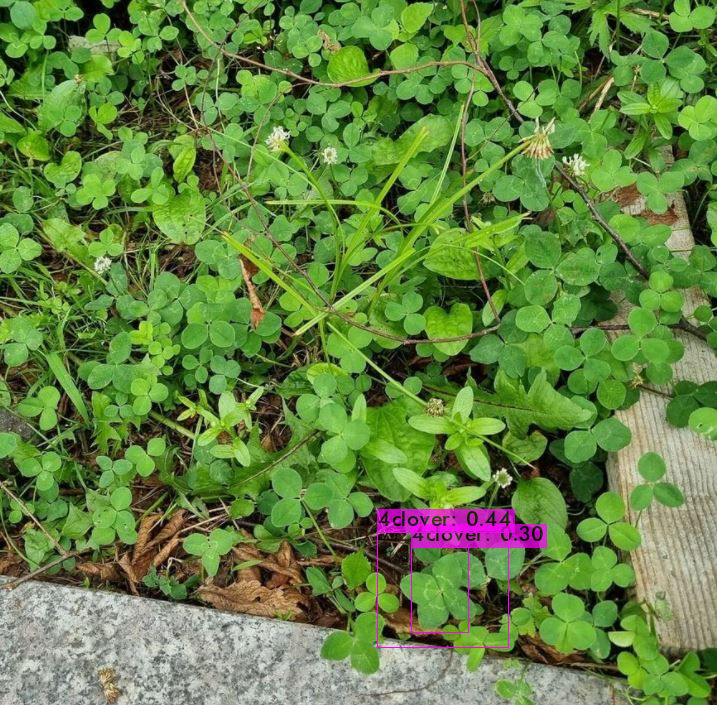

In [ ]:
# 예측 결과 보기
from IPython.display import Image
Image('/content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/predictions.jpg') 

In [ ]:
# 성능 평가
# cfg파일 및 weight파일 변경
%cd /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64
!./darknet detector map /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/data/chun.data /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/chun_3.cfg /content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64/backup/chun_3.weights -dont_show

/content/gdrive/MyDrive/Chunknet/darknet-master/build/darknet/x64
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 